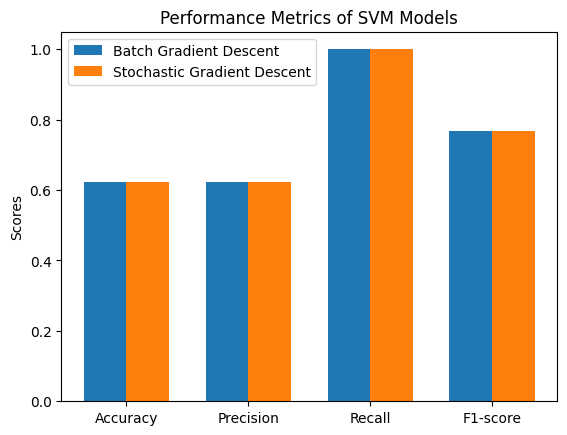

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

class SVM_BatchGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.iterations):
            for j in range(self.m):
                if y[j] * (np.dot(X[j], self.weights) - self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1/self.iterations * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1/self.iterations * self.weights - np.dot(X[j], y[j]))
                    self.bias -= self.learning_rate * y[j]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

class SVM_StochasticGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.iterations):
            for j in range(self.m):
                random_index = np.random.randint(0, self.m)
                X_i = X[random_index]
                y_i = y[random_index]
                if y_i * (np.dot(X_i, self.weights) - self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1/self.iterations * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1/self.iterations * self.weights - np.dot(X_i, y_i))
                    self.bias -= self.learning_rate * y_i

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM model using batch gradient descent
svm_batchgd = SVM_BatchGD(learning_rate=0.01, iterations=1000)
svm_batchgd.fit(X_train, y_train)
y_pred_batchgd = svm_batchgd.predict(X_test)

# Initialize and train SVM model using stochastic gradient descent
svm_stochasticgd = SVM_StochasticGD(learning_rate=0.01, iterations=1000)
svm_stochasticgd.fit(X_train, y_train)
y_pred_stochasticgd = svm_stochasticgd.predict(X_test)

# Evaluate performance
batchgd_metrics = [accuracy_score(y_test, y_pred_batchgd),
                   precision_score(y_test, y_pred_batchgd),
                   recall_score(y_test, y_pred_batchgd),
                   f1_score(y_test, y_pred_batchgd)]

stochasticgd_metrics = [accuracy_score(y_test, y_pred_stochasticgd),
                        precision_score(y_test, y_pred_stochasticgd),
                        recall_score(y_test, y_pred_stochasticgd),
                        f1_score(y_test, y_pred_stochasticgd)]

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, batchgd_metrics, width, label='Batch Gradient Descent')
rects2 = ax.bar(x + width/2, stochasticgd_metrics, width, label='Stochastic Gradient Descent')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of SVM Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [6]:
print("Metrics for SVM model using Batch Gradient Descent:")
print("Accuracy:", batchgd_metrics[0])
print("Precision:", batchgd_metrics[1])
print("Recall:", batchgd_metrics[2])
print("F1-score:", batchgd_metrics[3])

print("\nMetrics for SVM model using Stochastic Gradient Descent:")
print("Accuracy:", stochasticgd_metrics[0])
print("Precision:", stochasticgd_metrics[1])
print("Recall:", stochasticgd_metrics[2])
print("F1-score:", stochasticgd_metrics[3])


Metrics for SVM model using Batch Gradient Descent:
Accuracy: 0.6228070175438597
Precision: 0.6228070175438597
Recall: 1.0
F1-score: 0.7675675675675676

Metrics for SVM model using Stochastic Gradient Descent:
Accuracy: 0.6228070175438597
Precision: 0.6228070175438597
Recall: 1.0
F1-score: 0.7675675675675676


In [7]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Batch Gradient Descent SVM
conf_matrix_batchgd = confusion_matrix(y_test, y_pred_batchgd)

# Compute confusion matrix for Stochastic Gradient Descent SVM
conf_matrix_stochasticgd = confusion_matrix(y_test, y_pred_stochasticgd)

print("Confusion matrix for SVM model using Batch Gradient Descent:")
print(conf_matrix_batchgd)

print("\nConfusion matrix for SVM model using Stochastic Gradient Descent:")
print(conf_matrix_stochasticgd)


Confusion matrix for SVM model using Batch Gradient Descent:
[[ 0 43]
 [ 0 71]]

Confusion matrix for SVM model using Stochastic Gradient Descent:
[[ 0 43]
 [ 0 71]]
